In [86]:
import pandas as pd
import pymongo
import seaborn
%matplotlib inline
#seaborn.set_style("whitegrid", {"grid.linewidth": .5, "axes.facecolor": ".9"})
seaborn.set_context("notebook", font_scale=1.9)

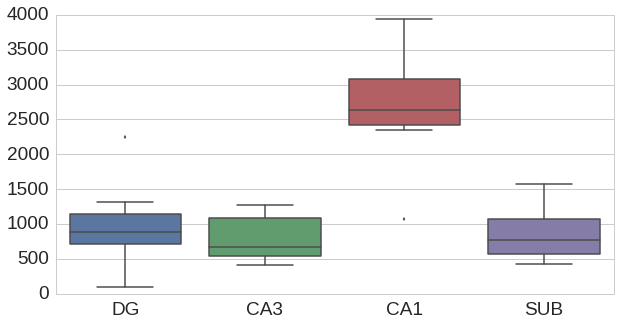

In [89]:
a = pymongo.MongoClient()
data = a.test.morpho.aggregate([
        {"$match": {"tint": "AT8"}}, 
        {"$group" : {"_id": "$region", "value": {"$addToSet": "$cells/volume (mm3)"} } }, 
        {"$project" : { "label": "$_id", "value":1 , "_id": 0}}, 
        {"$sort" : { "label": 1 } }
    ])["result"]

sorter = ["DG","CA3","CA1","SUB"]
sorterIndex = dict(zip(sorter,range(len(sorter))))


df = pd.DataFrame(data)
df = df.set_index("label")

seaborn.plt.figure(1, (10,5))
seaborn.boxplot(df.ix[sorter].value, names=list(df.ix[sorter].index))